<a href="https://colab.research.google.com/github/dradra0905/DataMiningWebNovel/blob/main/datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
filename = './data.txt'

file = open(filename, "r", encoding='utf-8')
data = file.readlines()
file.close()

cleaned_data = [item.replace('\n', '') for item in data]
cleaned_data = [item.replace(',', '') for item in cleaned_data]
cleaned_data = [item.replace('만', '000') if '.' in item else item.replace('만', '0000') for item in cleaned_data]
cleaned_data = [item.replace('억', '0000000') if '.' in item else item.replace('억', '00000000') for item in cleaned_data]
cleaned_data = [item.replace('0000능', '만능') for item in cleaned_data]
cleaned_data = [item.replace('000능', '만능') for item in cleaned_data]
cleaned_data = [item.replace('.', '') for item in cleaned_data]
cleaned_data = [item.replace('#', ',') for item in cleaned_data]
cleaned_data = [item.replace('--------', '\n') for item in cleaned_data]

# 리스트를 하나의 문자열로 결합
data_str = ''.join(cleaned_data)

# 결합된 문자열을 '\n'을 기준으로 나눔
data_list = [item.strip() for item in data_str.split('\n') if item.strip()]
processed_data = []

for item in data_list:
    if ',' in item:
        # 쉼표(,)가 있는 경우 쉼표를 기준으로 분할하여 리스트로 추가
        item_list = item.split(',')
        processed_data.append(item_list)
    else:
        # 쉼표(,)가 없는 경우 단일 항목 리스트로 추가
        processed_data.append([item])

new_data = []

for sublist in processed_data:
    if sublist:
        first_element = int(sublist[0])
        new_value = first_element // 100000

        for _ in range(new_value):
            # 원본 리스트의 첫 번째 요소를 10만으로 나눈 값을 추가하는 부분
            new_sublist = sublist.copy()
            new_data.append(new_sublist)


processed_data_filtered = [item[1:] for item in new_data if len(item) > 1]
# 단어 치환 함수
def replace_words(sentence, original_word, replacement_word):
    return [replacement_word if original_word in word else word for word in sentence]

# "0000남"을 "만남"으로 바꾸기
replaced_sentences = [replace_words(sentence, "0000남", "만남") for sentence in processed_data_filtered]
replaced_sentences = [replace_words(sentence, "000남", "만남") for sentence in replaced_sentences]
replaced_sentences = [replace_words(sentence, "00000000", "억") for sentence in replaced_sentences]

print(replaced_sentences)

[['로맨스판타지', '육아물', '성장물', '환생물', '가족물', '무협물', '여주판타지', '첫사랑', '천재', '왕족/귀족', '카리스마남', '능력남', '능력녀', '외유내강', '걸크러쉬'], ['로맨스판타지', '육아물', '성장물', '환생물', '가족물', '무협물', '여주판타지', '첫사랑', '천재', '왕족/귀족', '카리스마남', '능력남', '능력녀', '외유내강', '걸크러쉬'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능력'], ['차원이동', '정통', '빙의', '조력자', '검사', '망나니', '왕족/귀족', '이능력', '마왕', '성장', '초능

In [46]:
element_counts = {}

# 데이터 처리
for sublist in replaced_sentences:
    for element in sublist:
        if element in element_counts:
            element_counts[element]["count"] += 1
            element_counts[element]["individual_count"] = len(sublist)
        else:
            element_counts[element] = {"count": 1, "individual_count": len(sublist)}

# 등장 횟수(count)를 기준으로 딕셔너리를 정렬
sorted_counts = sorted(element_counts.items(), key=lambda x: x[1]["count"], reverse=True)
scount=0
# 결과 출력
for element, counts in sorted_counts:
    count = counts["count"]
    scount+=1
    print(f"{element}: {count}, Count: {scount}")

먼치킨: 5533, Count: 1
성장: 5359, Count: 2
천재: 4647, Count: 3
노력: 3458, Count: 4
능력녀: 3356, Count: 5
마법사: 3343, Count: 6
로맨스판타지: 3246, Count: 7
학원: 2658, Count: 8
네크로맨서: 2438, Count: 9
여주판타지: 2095, Count: 10
걸크러쉬: 2021, Count: 11
성장물: 1912, Count: 12
생존: 1899, Count: 13
시스템: 1785, Count: 14
하렘: 1731, Count: 15
이능력: 1693, Count: 16
마왕: 1603, Count: 17
빙의물: 1592, Count: 18
만능: 1581, Count: 19
회귀: 1565, Count: 20
회귀물: 1526, Count: 21
성직자: 1513, Count: 22
레이드: 1400, Count: 23
정통: 1349, Count: 24
능력남: 1337, Count: 25
검사: 1281, Count: 26
초능력: 1257, Count: 27
격투가: 1174, Count: 28
마검사: 1132, Count: 29
털털녀: 1058, Count: 30
외유내강: 1048, Count: 31
상처남: 1038, Count: 32
엉뚱발랄녀: 1018, Count: 33
복수: 968, Count: 34
대장장이/생산직: 938, Count: 35
포식/흡수: 938, Count: 36
라이벌/앙숙: 930, Count: 37
경쟁구도: 930, Count: 38
다정남: 914, Count: 39
환생: 890, Count: 40
사이다녀: 874, Count: 41
뇌섹녀: 845, Count: 42
우월녀: 839, Count: 43
순진남: 831, Count: 44
동정남: 831, Count: 45
육아: 812, Count: 46
전문직: 781, Count: 47
개그물: 760, Count: 48
레이드물: 7

In [52]:
from itertools import combinations
import numpy as np
import csv

def jaccard_similarity(set1, set2):
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))
    return intersection_size / union_size if union_size != 0 else 0

# 데이터에서 유일한 단어 추출
unique_words = list(set(word for sublist in replaced_sentences for word in sublist))

# Jaccard 유사도 행렬 초기화
num_unique_words = len(unique_words)
jaccard_matrix = np.zeros((num_unique_words, num_unique_words))

# 모든 단어 쌍에 대한 Jaccard similarity 계산 및 행렬에 저장
for i, word1 in enumerate(unique_words):
    for j, word2 in enumerate(unique_words):
        if i < j:  # 행렬의 대각선 및 반대편은 계산할 필요 없음
            set1 = set(word for sublist in replaced_sentences if word1 in sublist for word in sublist)
            set2 = set(word for sublist in replaced_sentences if word2 in sublist for word in sublist)
            similarity = jaccard_similarity(set1, set2)

            jaccard_matrix[i, j] = similarity
            jaccard_matrix[j, i] = similarity  # 대칭성을 유지하기 위해 반대편도 채움

# 결과를 CSV 파일에 저장
csv_filename = "jaccard_similarity_matrix.csv"
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerows(jaccard_matrix)

print(f"Jaccard similarity matrix saved to '{csv_filename}'")

Jaccard similarity matrix saved to 'jaccard_similarity_matrix.csv'


In [57]:
from sklearn.cluster import KMeans
import numpy as np

# Jaccard Similarity 파일 읽어오기
similarities = np.loadtxt('jaccard_similarity_matrix.csv', delimiter=',')

# KMeans 클러스터링
k = 20  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(similarities)

# 클러스터 결과 출력
labels = kmeans.labels_

# 클러스터별로 속한 단어들을 모아 출력
clusters = [[] for _ in range(k)]

# Assuming unique_words contains the original words
for word, cluster in zip(unique_words, labels):
    clusters[cluster].append(word)

# 출력
for i, words_in_cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {', '.join(words_in_cluster)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: 달달물, 정략결혼, 계약관계, 엉뚱발랄녀, 로맨틱코미디, 존댓말남, 소유욕/독점욕
Cluster 2: SF, 군인, 메디컬, 퓨전, 독, 기갑, 의사, 명문세가, BJ, AI, 작가, 용병, 신, 권, 실존인물, 마교
Cluster 3: 착각, 마검사, 복수, 이능력, 초능력, 마법사, 마왕, 조력자, 망나니, 아티팩트, 검사, 성장, 성좌, 귀환, 고인물, 학원, 정통, 용사, 레이드, 빙의, 노력, 영지, 회귀, 차원이동, 무공, 게임, 영웅/신화, 만능, 깽판, 전쟁, 시스템, 생존, 환생
Cluster 4: 츤데레남, 시월드, 순정녀, 오피스물, 현대로맨스, 재벌남, 사내연애, 신데렐라
Cluster 5: 가상시대물, 대형견남, 차도남, 카리스마남, 무심녀, 역하렘, 초월적존재, 유혹남, 계략녀
Cluster 6: 만남, 가족후회물, 미스터리, 잔잔물, 착각물, 레이드물, 짝사랑
Cluster 7: 로맨스판타지, 빙의물, 능력녀, 성장물, 능력남, 순정남, 힐링물, 육아물, 걸크러쉬, 여주판타지, 집착남, 다정남
Cluster 8: 개그물, 냉정남, 경쟁구도, 직진녀, 라이벌/앙숙, 베이비메신저, 트라우마, 능글남, 배틀연애
Cluster 9: 정령, 매니저, 정령술사, 방송, 테이밍, 회사원, 법조인, 육아, 경영/기업, 축구, 힐러, 살수, 대체역사, 가수, 배우, 재벌, 정치가, TS, 학생, 먹방/요리, 전문직, 미스테리, 스포츠
Cluster 10: 메디컬물, 친구>연인, 도도녀, 타임슬립, 차원이동물, 소꿉친구
Cluster 11: 후회남, 냉정녀, 철벽녀, 오해물, 암투물, 피폐물, 쌍방삽질, 드라마, 삼각관계
Cluster 12: 포식/흡수, 하렘, 네크로맨서, 라이트노벨, 성직자, 격투가, 아포칼립스, 대장장이/생산직, 탑등반
Cluster 13: 정파, 검, 천마, 사파, 지존, 협객
Cluster 14: 자상녀, 상처녀, 순진녀, 복수물, 운명
Cluster 15: 무협물, 가족물, 외유내강, 털털녀, 다정녀, 조

In [29]:
!pip install matplotlib

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

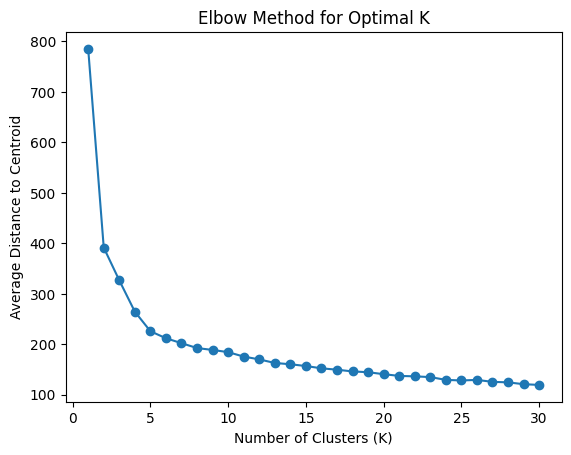

In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Jaccard Similarity 파일 읽어오기
similarities = np.loadtxt('jaccard_similarity_matrix.csv', delimiter=',')

# 최적의 K를 찾기 위한 Elbow Method
max_k = 30  # 최대 클러스터 수
distortions = []

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(similarities)
    distortions.append(kmeans.inertia_)

# Elbow Method 그래프
plt.plot(range(1, max_k + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Distance to Centroid')
plt.show()